# Predictive Modeling D208 - Logistic Regression
---

## Overview
The following is an exercise in using Logistic Regression to develop a predictive model.  Our dataset will be telecom customer information.  There are 10,000 records with various customer data points, including purchased options, geography, demographics, and whether or not the customer transferred to another service provider.
<br><br>
Our focus will be predicting customers that are more prone to leave for another provider (churn).  This is a common focus of data science teams across multiple industries.
<br><br>
It is commonly found that attracting new customers is very costly, therefore attention should be given to retaining the current customer base.  This will have multiple positive impacts such as reducing the loss of sales during turnover, and giving the brand a better reputation due to customer satisfaction.
<br><br>
This problem is a good fit for Logistic Regression because it is focused on classifying the customers into groups of two - likely to leave, and not likely to leave.  Logistic Regression is a valuable tool in predicting binary data points.
<br><br>

## Objectives & Goals
We will perform basic analysis in preparation of building a predictive model utilizing logistic regression.  After that, we will refine the model by re-evaluating the independent variables and updating the model.
<br><br>
Logistic Regression Models are not bound by many of the assumptions associated with Linear Regression (Assumptions of Logistic Regression, n.d.), but there are some assumptions to be aware of -
- The dependent variable must be either binary or ordinal (depending on the type of logistic regression used) (Zach, 2020)
- All observations must be independent of each other (random, unique samples) (Zach, 2020)
- There should be little or no Multicollinearity between the independent variables (Zach, 2020)
- There are no extreme outliers in the independent variables (Zach, 2020)
- There is a linear relationship between the independent variables and the log odds (Zach, 2020)
- There is a sufficiently large sample set of data (Zach, 2020)

<br><br>
Our goal will be the development of a cleaned dataset that contains relevant independent variables along with the target, and a model that utilizes that data to produce predictions.  
<br><br>

## Plan
I will use Python for this project.  There are numerous benefits of using Python for data science projects, including but not limited to -
- Python can be used for full application development, so projects created with it can always be expanded or integrated into larger projects when necessary
- The pandas dataframe object and the methods contained within make dealing with tabular data very straightforward
- The ScikiLearn and StatModel packages make data science and statistical tasks exponentially easier to complete
- Python syntax is highly readable and easy to learn

<br><br>
I will use the following steps during this analysis -
1. Exploratory Data Analysis  
 1.1 Examine the variables included in the dataset  
 1.2 Perform an initial reduction of variables  
 1.3 Transform categorical variables into quantitive variables  
 1.4 Inspect variables for outliers  
 1.5 Univariate visualizations  
 1.6 Discuss Summary Statistics  
 1.7 Perform normalization if necessary  
 1.8 Run initial tests for correlation (including bivariate visualizations)  
 1.9 Save the prepared dataset  
2. Model Creation  
 2.1 Separate the dependent and independent variables  
 2.2 Fit the data into a model  
 2.3 Explore columns to determine candidates for removal  
 2.4 Fit the revised model  
 2.5 Model comparison
3. Summarize results including a measure of performance.  
 3.1 Output
 3.2 Recommendations
<br><br>

---
## 1. Exploratory Data Analysis  
### 1.1 Examine the variables included in the dataset


In [1]:
#!wget -q https://raw.githubusercontent.com/drharv/D208/main/churn_clean.csv
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import statsmodels.api as sm
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
sns.set_theme(style="ticks")

df = pd.read_csv('data/churn_clean.csv')
df.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'Churn',
       'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
       'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService',
       'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5',
       'Item6', 'Item7', 'Item8'],
      dtype='object')

In [2]:
df.shape

(10000, 50)

In [3]:
df.dtypes

CaseOrder                 int64
Customer_id              object
Interaction              object
UID                      object
City                     object
State                    object
County                   object
Zip                       int64
Lat                     float64
Lng                     float64
Population                int64
Area                     object
TimeZone                 object
Job                      object
Children                  int64
Age                       int64
Income                  float64
Marital                  object
Gender                   object
Churn                    object
Outage_sec_perweek      float64
Email                     int64
Contacts                  int64
Yearly_equip_failure      int64
Techie                   object
Contract                 object
Port_modem               object
Tablet                   object
InternetService          object
Phone                    object
Multiple                 object
OnlineSe

In [4]:
# Check for any null values
df.isnull().sum()

CaseOrder               0
Customer_id             0
Interaction             0
UID                     0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
TimeZone                0
Job                     0
Children                0
Age                     0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
PaymentMetho

>No null values are present, so no records need to be removed for cleansing.
### 1.2 Perform an initial reduction of variables

In [5]:
# Remove columns that should have no impact on Churn
df.drop(columns=['CaseOrder','Customer_id','Interaction','UID','City','State','County', 'Zip', 'TimeZone', 'Job','Contract', 'PaymentMethod'], inplace=True)

In [6]:
#Preview the data in the trimmed dataset
df.sample(10)

,Lat,Lng,Population,Area,Children,Age,Income,Marital,Gender,Churn,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
2613,45.55988,-96.56527,5,Rural,0,31,31609.92,Widowed,Female,Yes,...,220.147800,736.355389,3,2,4,4,5,4,5,4
1825,43.12892,-77.60518,24542,Rural,1,35,38328.57,Widowed,Male,Yes,...,204.961033,661.209438,5,4,4,3,4,4,4,3
786,38.43713,-122.66594,21448,Suburban,4,50,49740.98,Married,Female,Yes,...,129.991530,1848.639719,3,4,3,4,4,3,3,5
9783,31.85719,-106.38040,5907,Suburban,0,27,31930.06,Divorced,Male,No,...,179.947600,5056.967909,4,3,3,2,5,2,5,3
8690,33.93840,-79.76241,5350,Urban,0,30,37631.87,Married,Female,No,...,152.455500,6256.189224,2,3,2,4,3,2,5,4
1834,43.05729,-83.74984,27361,Urban,0,51,86039.43,Separated,Male,No,...,92.455141,798.427518,2,2,1,3,1,4,4,4
6474,37.84717,-85.46922,136,Rural,0,82,56960.58,Married,Female,No,...,127.473800,5450.679530,6,4,5,4,3,5,5,5
8515,32.72761,-93.63354,13061,Rural,1,85,8667.17,Married,Female,No,...,242.657300,6020.902258,2,3,3,3,3,2,2,4
5932,42.47465,-75.04058,21997,Suburban,0,73,18957.86,Divorced,Female,No,...,129.959800,6317.989438,4,2,3,3,5,3,2,2
7548,40.41036,-97.45682,253,Suburban,0,56,61449.42,Never Married,Female,No,...,242.614300,3937.196959,4,3,4,5,2,4,5,4


>The dataset is starting to look more appropriate for a regression model.  Now we will begin converting categorical variables into qualititive values.
### 1.3 Transform categorical variables into quantitive variables

In [7]:
# Columns that need to be transformed
# Area
# Marital
# Gender
# Churn (Yes/No)
# Techie (Yes/No)
# Port_modem (Yes/No)
# Tablet (Yes/No)
# InternetService
# Phone (Yes/No)
# Multiple (Yes/No)
# OnlineSecurity (Yes/No)
# OnlineBackup (Yes/No)
# DeviceProtection (Yes/No)
# TechSupport (Yes/No)
# StreamingTV (Yes/No)
# StreamingMovies (Yes/No)
# PaperlessBilling (Yes/No)

In [8]:
# Collect the distinct values for each of the non-Yes/No variables
df.Area.value_counts()

Suburban    3346
Rural       3327
Urban       3327
Name: Area, dtype: int64

In [9]:
df.Marital.value_counts()

Divorced         2092
Widowed          2027
Separated        2014
Never Married    1956
Married          1911
Name: Marital, dtype: int64

In [10]:
df.Gender.value_counts()

Female       5025
Male         4744
Nonbinary     231
Name: Gender, dtype: int64

In [11]:
df.InternetService.value_counts()

Fiber Optic    4408
DSL            3463
None           2129
Name: InternetService, dtype: int64

In [12]:
# Area
# Create a list of conditions
conditions = [(df['Area'] == "Rural")
            , (df['Area'] == "Suburban")
            , (df['Area'] == "Urban")]
# Create a list of the values
values = [1,2,3]
# Save the values
newColumn = np.select(conditions, values)
# Replace the column with the quantive version
df.drop(columns='Area', inplace=True)
df['Area'] = newColumn

In [13]:
# Marital
# Create a list of conditions
conditions = [(df['Marital'] == "Never Married")
            , (df['Marital'] == "Separated")
            , (df['Marital'] == "Divorced")
            , (df['Marital'] == "Widowed")
            , (df['Marital'] == "Married")]
# Create a list of the values
values = [1,2,3,4,5]
# Save the values
newColumn = np.select(conditions, values)
# Replace the column with the quantive version
df.drop(columns='Marital', inplace=True)
df['Marital'] = newColumn

In [14]:
# Gender
# Create a list of conditions
conditions = [(df['Gender'] == "Nonbinary")
            , (df['Gender'] == "Female")
            , (df['Gender'] == "Male")]
# Create a list of the values
values = [1,2,3]
# Save the values
newColumn = np.select(conditions, values)
# Replace the column with the quantive version
df.drop(columns='Gender', inplace=True)
df['Gender'] = newColumn

In [15]:
# InternetService
# Create a list of conditions
conditions = [(df['InternetService'] == "None")
            , (df['InternetService'] == "DSL")
            , (df['InternetService'] == "Fiber Optic")]
# Create a list of the values
values = [1,2,3]
# Save the values
newColumn = np.select(conditions, values)
# Replace the column with the quantive version
df.drop(columns='InternetService', inplace=True)
df['InternetService'] = newColumn

In [16]:
# All Yes/No columns
def convertYesNoColumn(df, columnName):
  values = [0,1]
  conditions = [(df[columnName] == "No")
              , (df[columnName] == "Yes")]
  newColumn = np.select(conditions, values)
  df.drop(columns=columnName, inplace=True)
  df[columnName] = newColumn

convertYesNoColumn(df, 'Techie')
convertYesNoColumn(df, 'Port_modem')
convertYesNoColumn(df, 'Tablet')
convertYesNoColumn(df, 'Phone')
convertYesNoColumn(df, 'Multiple')
convertYesNoColumn(df, 'OnlineSecurity')
convertYesNoColumn(df, 'OnlineBackup')
convertYesNoColumn(df, 'DeviceProtection')
convertYesNoColumn(df, 'TechSupport')
convertYesNoColumn(df, 'StreamingTV')
convertYesNoColumn(df, 'StreamingMovies')
convertYesNoColumn(df, 'PaperlessBilling')
convertYesNoColumn(df, 'Churn')

In [17]:
df.head()

,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,...,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Churn
0,56.25100,-133.37571,38,0,68,28561.99,7.978323,10,0,1,...,1,0,1,1,0,0,0,1,1,0
1,44.32893,-84.24080,10446,1,27,21704.77,11.699080,12,0,1,...,1,1,1,0,0,0,1,1,1,1
2,45.35589,-123.24657,3735,4,50,9609.57,10.752800,9,0,1,...,1,1,0,0,0,0,0,1,1,0
3,32.96687,-117.24798,13863,1,48,18925.23,14.913540,15,2,0,...,1,0,1,0,0,0,1,0,1,0
4,29.38012,-95.80673,11352,0,83,40074.19,8.147417,16,2,1,...,0,0,0,0,0,1,1,0,0,1


>Now all data has been converted to quantitive values and is closer to being ready for model creation.
### 1.4 Inspect variables for outliers

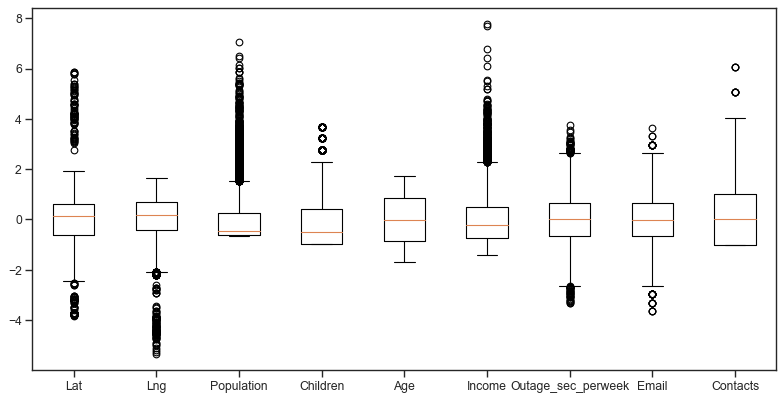

In [18]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from matplotlib.pyplot import figure

figure(figsize=(12, 6), dpi=80)

standardization = StandardScaler(with_mean=True, with_std=True)
Xs = standardization.fit_transform(df)
labels = df.columns
boxplot = plt.boxplot(Xs[:, 0:9], labels=labels[0:9])

>There are a few minor outliers, but nothing that is cause for removal.
### 1.5 Univariate visualizations
>Now we will example some of the distributions (beyond the box plots that we just viewed).

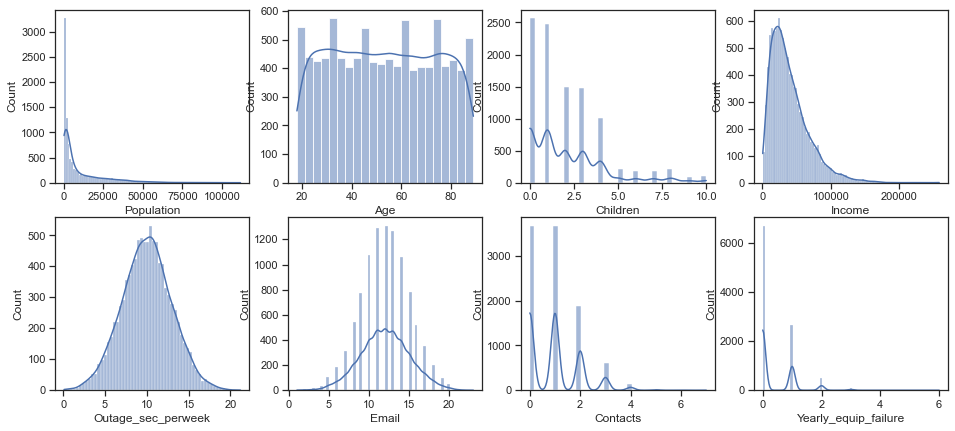

In [19]:
fig, axs = plt.subplots(2, 4, figsize=(16, 7))

sns.histplot(data=df, x="Population", kde=True, ax=axs[0, 0])
sns.histplot(data=df, x="Age", kde=True, ax=axs[0, 1])
sns.histplot(data=df, x="Children", kde=True, ax=axs[0, 2])
sns.histplot(data=df, x="Income", kde=True, ax=axs[0, 3])
sns.histplot(data=df, x="Outage_sec_perweek", kde=True, ax=axs[1, 0])
sns.histplot(data=df, x="Email", kde=True, ax=axs[1, 1])
sns.histplot(data=df, x="Contacts", kde=True, ax=axs[1, 2])
sns.histplot(data=df, x="Yearly_equip_failure", kde=True, ax=axs[1, 3])
plt.show()

>Examining these visuals, we can see the following distribution types (Gallery of Distributions, n.d.) -
>- Normal: Outage Sec/Week, Email
>- Uniform: Age
>- Exponential: Population, Children, Contacts, Yearly Equip Failure
>- Weibull (possibly): Income

### 1.6 Discuss Summary Statistics

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Lat,10000.0,38.757567,5.437389,17.966120,35.341828,39.395800,42.106908,70.640660
Lng,10000.0,-90.782536,15.156142,-171.688150,-97.082813,-87.918800,-80.088745,-65.667850
Population,10000.0,9756.562400,14432.698671,0.000000,738.000000,2910.500000,13168.000000,111850.000000
Children,10000.0,2.087700,2.147200,0.000000,0.000000,1.000000,3.000000,10.000000
Age,10000.0,53.078400,20.698882,18.000000,35.000000,53.000000,71.000000,89.000000
Income,10000.0,39806.926771,28199.916702,348.670000,19224.717500,33170.605000,53246.170000,258900.700000
Outage_sec_perweek,10000.0,10.001848,2.976019,0.099747,8.018214,10.018560,11.969485,21.207230
Email,10000.0,12.016000,3.025898,1.000000,10.000000,12.000000,14.000000,23.000000
Contacts,10000.0,0.994200,0.988466,0.000000,0.000000,1.000000,2.000000,7.000000
Yearly_equip_failure,10000.0,0.398000,0.635953,0.000000,0.000000,0.000000,1.000000,6.000000


#### Summary Statistic Discussion
>There are a wide variety of ranges involved, from the binary variables that range from 0 to 1, to the income that ranges from 350 to 260K.  Below are some notes of interest.
>- All longitude values are negative, this is due to all customers being in the US
>- The mean for Techie is low at 0.17, indicating a customer base that is relatively unfamilar with technology
>- Churn overall is almost 27%, meaning there is definitely room for us to improve with the aid of analytics
>- As seen with the univariate visualizations, the age of customers seems to be very evenly distributed between 18 and 89


### 1.7 Perform normalization if necessary
>Some of the variables (namely Population, Income, and Bandwidth) have a large range when compared to the other variables.  We will perform a quick normalization to being all variables into a similar range.

In [21]:
x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled, columns=df.columns)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Lat,10000.0,0.394715,0.103226,0.0,0.329869,0.406832,0.458301,1.0
Lng,10000.0,0.763114,0.142955,0.0,0.703689,0.790126,0.863980,1.0
Population,10000.0,0.087229,0.129036,0.0,0.006598,0.026021,0.117729,1.0
Children,10000.0,0.208770,0.214720,0.0,0.000000,0.100000,0.300000,1.0
Age,10000.0,0.494062,0.291534,0.0,0.239437,0.492958,0.746479,1.0
Income,10000.0,0.152612,0.109069,0.0,0.073007,0.126945,0.204591,1.0
Outage_sec_perweek,10000.0,0.469128,0.140994,0.0,0.375150,0.469919,0.562347,1.0
Email,10000.0,0.500727,0.137541,0.0,0.409091,0.500000,0.590909,1.0
Contacts,10000.0,0.142029,0.141209,0.0,0.000000,0.142857,0.285714,1.0
Yearly_equip_failure,10000.0,0.066333,0.105992,0.0,0.000000,0.000000,0.166667,1.0


>Now all variables are in the range of 0 to 1.
### 1.6 Run intial tests for correlation (including bivariate visualizations)
>For exploring the data visually, we can create a few visuals that might bring to light some correlations.

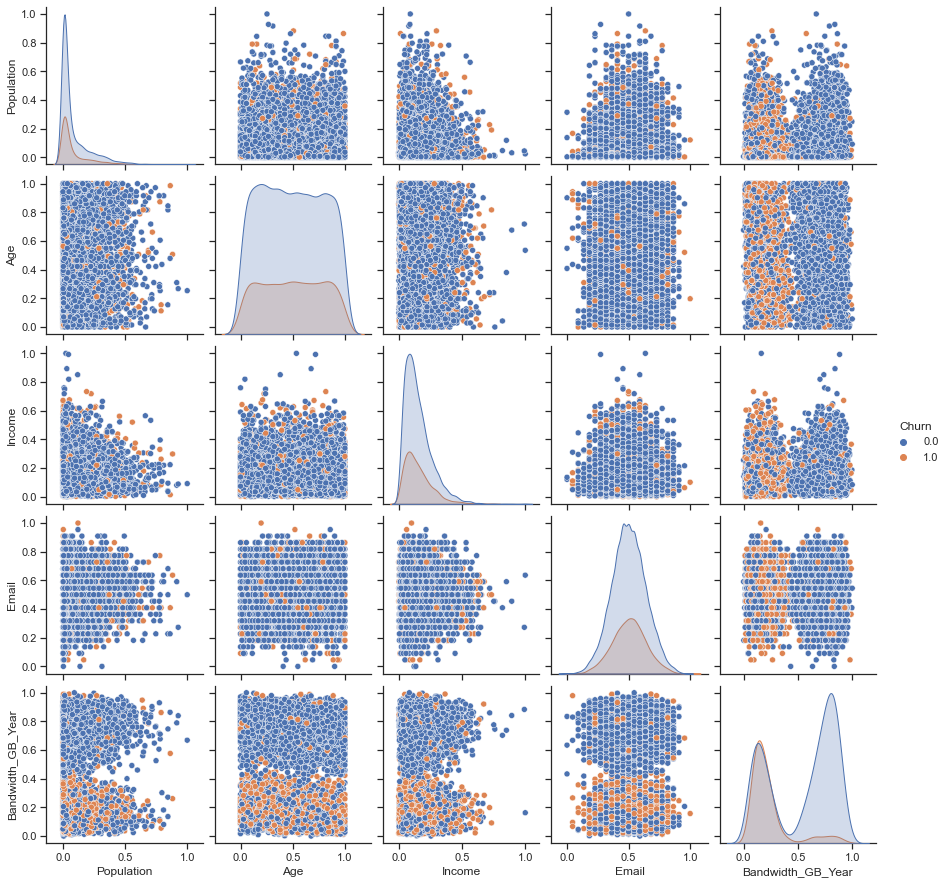

In [22]:
sns.pairplot(df[["Population","Age","Income","Email","Bandwidth_GB_Year","Churn"]], hue="Churn")

>By splitting the color on Churn, you can begin to see that there seem to be strong groupings in some of the variables, indicating some correlation. For example, it appears as though the lower bandwidth usage correlates heavily with churn.

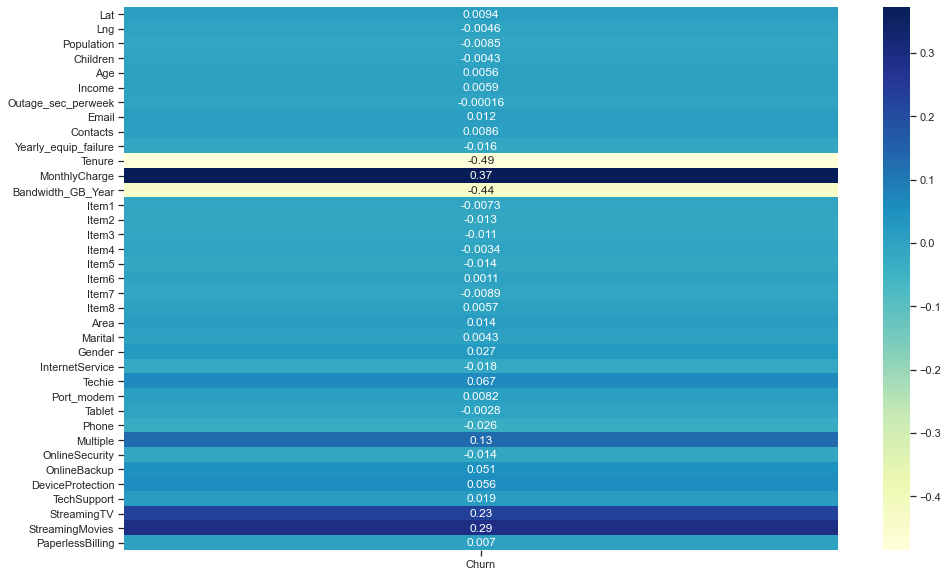

In [23]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr().loc[:'PaperlessBilling','Churn':], annot=True, cmap='YlGnBu');

>There appear to be a few columns that have some correlation with Churn.
### 1.7 Save the prepared dataset

In [24]:
df.to_csv('data/prepared_churn_208_task_2.csv')

## 2. Model Creation
### 2.1 Separate the dependent and independent variables

In [25]:
# Dependent (Target) Variable:
y = df['Churn']

# Independent Variables:
X = df.iloc[:, :-1]
variables = X.columns

### 2.2 Fit the data into a model

In [26]:
# Split our dataset into training and testing sets
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

lr = LogisticRegression()
fitted_model = lr.fit(X_train, y_train)

In [27]:
# Check against the testing set
y_pred = lr.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[1377,  109],
       [ 188,  326]])

#### Check accuracy of the model

Text(0.5, 257.44, 'Predicted label')

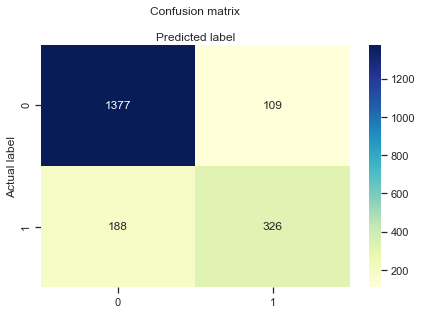

In [28]:
# Build a plot for the confusion matrix
class_names = [0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Fill it with a heatmap to visualize the confusion matrix
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [29]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8515
Precision: 0.7494252873563219
Recall: 0.6342412451361867


>The initial accuracy for our model is 85.15% and the precision is 0.75.
>These results are very successful for a predictive model, but we will still attempt to improve either the accuracy or performance with feature selection.

### 2.3 Explore columns to determine candidates for removal

>We will employ SelectFromModel to look for the best feature combinaitons.  By iterating over each number of possible features used, we can record the accuracy and determine the optimal number of features to include.

In [30]:
from sklearn.feature_selection import SelectFromModel

# Track results
count = []
accuracy = []
precision = []
top_accuracy = 0
top_features = []

# Get the count of features (not including the target variable)
variable_count = df.iloc[:, :-1].shape[1]
for feature_count in range(1, variable_count):
    # Reset the data
    X = df.iloc[:, :-1]
    variables = X.columns
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

    # Run the SelectFromModel
    sfm = SelectFromModel(lr, threshold=-np.inf, max_features=feature_count)
    sfm.fit(X_train, y_train)
    feature_idx = sfm.get_support()
    selected = variables[feature_idx]

    # Use the current selection of features
    X = df[selected]
    variables = X.columns
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
    lr = LogisticRegression(max_iter=1000)
    fitted_model = lr.fit(X_train, y_train)

    # Check against the testing set
    y_pred = lr.predict(X_test)
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
    
    # Record the results
    count.append(feature_count)
    accuracy.append(metrics.accuracy_score(y_test, y_pred))
    precision.append(metrics.precision_score(y_test, y_pred))
    
    # Store this run if it's the current best
    if metrics.accuracy_score(y_test, y_pred) > top_accuracy:
        top_accuracy = metrics.accuracy_score(y_test, y_pred)
        top_features = selected

results = {"feature_count":count, "accuracy":accuracy, "precision":precision}
dfResults = pd.DataFrame.from_dict(results)
print(dfResults)

    feature_count  accuracy  precision
0               1    0.7550   0.525105
1               2    0.8340   0.714623
2               3    0.8370   0.722749
3               4    0.8420   0.739130
4               5    0.8440   0.743961
5               6    0.8495   0.752969
6               7    0.8455   0.738928
7               8    0.8535   0.763723
8               9    0.8525   0.761337
9              10    0.8525   0.761337
10             11    0.8525   0.757647
11             12    0.8500   0.746544
12             13    0.8510   0.748848
13             14    0.8495   0.743707
14             15    0.8485   0.743649
15             16    0.8490   0.745370
16             17    0.8485   0.743649
17             18    0.8505   0.749420
18             19    0.8505   0.748268
19             20    0.8485   0.743649
20             21    0.8485   0.743649
21             22    0.8500   0.747685
22             23    0.8505   0.749420
23             24    0.8505   0.749420
24             25    0.85

In [31]:
print("Best number of features -", len(top_features))
print("With an accuracy of", top_accuracy)
print("Feature List:", top_features)

Best number of features - 8
With an accuracy of 0.8535
Feature List: Index(['Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'InternetService',
       'Techie', 'Multiple', 'StreamingTV', 'StreamingMovies'],
      dtype='object')


### 2.4 Fit the revised model

In [32]:
X = df[top_features]
variables = X.columns
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
lr = LogisticRegression(max_iter=1000)
fitted_model = lr.fit(X_train, y_train)

# Check against the testing set
y_pred = lr.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

In [33]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

print("")
print("Intial Variables:", variable_count)
print("Optimal Variables:", len(top_features))

Accuracy: 0.8535
Precision: 0.7637231503579952
Recall: 0.622568093385214

Intial Variables: 37
Optimal Variables: 8


Our revised model now has an accuracy of 85.35% and precision of 0.76.  This is after reducing the model from 37 to 8 features.

### 2.5 Model Comparison

>We were able to improve our predicition and resource usage with a revised model.  Although the accuracy is a slight change, it is still positive with 78% less variables - which translates to less resources used and less data that needs to be collected and cleansed.

<br><br>

| Model | Features | Accuracy | Precision | Recall |
|-----|-----|-----|-----|-----|
| Original | 37 | 0.8515 | 0.7494 | 0.6342 |
| Revised | 8 | 0.8535 | 0.7637 | 0.6226 |
|---|---|---|---|---|
| Difference | -29 | +0.02 | +0.0143 | -0.0116 |

---
## Results
## 3. Summarize results including a measure of performance

### 3.1 Output

>**Our accuracy is 0.8535.**  This is considered a high score for accuracy.  Fine tuning the feature selection allowed us to eliminate 78% of the original feature set, enabling reduced resource usage.

>There are multiple other options for feature selection such as RFE, and given enough time, exploring them could result in a higher R2 value.

>The final confusion matrix and outputs are shown below.

Text(0.5, 257.44, 'Predicted label')

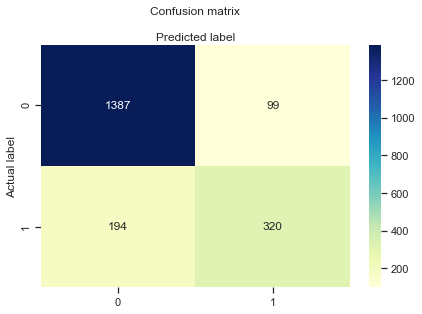

In [34]:
# Build a plot for the confusion matrix
class_names = [0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Fill it with a heatmap to visualize the confusion matrix
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.93      0.90      1486
         1.0       0.76      0.62      0.69       514

    accuracy                           0.85      2000
   macro avg       0.82      0.78      0.80      2000
weighted avg       0.85      0.85      0.85      2000



#### Equations (Baratloo et al., 2015) (Li, 2019)

>Accuracy = (TN + TP) / (TN+TP+FN+FP) = (Number of correct assessments)/Number of all assessments)  
>Precision = TP / (TP + FP)  
>Recall = TP / (TP + FN)

>TP = True Positives, FP = False Positives, TN = True Negatives, FN = False Negatives

#### Regression Equation

In [36]:
print(fitted_model.intercept_)
print(fitted_model.coef_)
print(top_features)

[-2.41169048]
[[-7.27609381  3.90222028  2.06789297 -0.73797578  0.70888782  0.47535472
   1.07024499  1.35224855]]
Index(['Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'InternetService',
       'Techie', 'Multiple', 'StreamingTV', 'StreamingMovies'],
      dtype='object')


>Based on the intercept and the coefficients, our equation is as follows (Multiple Logistic Regression Analysis, 2013) -

>ln(p̂ / (1-p̂)) = -2.41 + -7.28Tenure + 3.90Charge + 2.07Bandwidth + -.074Service + 0.71Techie + 0.48Multiple + 1.07TV + 1.35Movies

### 3.2 Recommendations

I would recommend multiple courses of action based on our analysis -
<br><br>
1. Collection of more data points about our customers.  More demographic information about how they identify theirselves could lead to a better model.  
<br><br>
2. Take the current model and start using 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'InternetService', 'Techie', 'Multiple', 'StreamingTV', and 'StreamingMovies' to determine which customers should receive extra attention.  A small effort towards keeping these customers could save an abundance of money in the future - both by keeping the existing cash flow and requiring less for the new customer aquisition costs.


---
## References

### Theory

Assumptions of Logistic Regression. (n.d.). Statistics Solutions. Retrieved March 30, 2021, from https://www.statisticssolutions.com/assumptions-of-logistic-regression/

Zach (2020, October 13). The 6 Assumptions of Logistic Regression (With Examples). Statology. https://www.statology.org/assumptions-of-logistic-regression/

Gallery of Distributions. (n.d.). Engineering Statistics Handbook. Retrieved March 30, 2021, from https://www.itl.nist.gov/div898/handbook/eda/section3/eda366.htm

Multiple Logistic Regression Analysis. (2013, January 17). Multivariable Methods. https://sphweb.bumc.bu.edu/otlt/mph-modules/bs/bs704_multivariable/bs704_multivariable8.html#:%7E:text=Simple%20logistic%20regression%20analysis%20refers,more%20than%20one%20independent%20variable

Li, S. (2019, February 27). Building A Logistic Regression in Python, Step by Step. Medium. https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8. 

Baratloo, A., Hosseini, M., Negida, A., &amp; El Ashal, G. (2015). Part 1: Simple Definition and Calculation of Accuracy, Sensitivity and Specificity. Emergency (Tehran, Iran). https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4614595/. 

### Code

Jupyter Formatting - https://stackoverflow.com/questions/51573722/nested-numbered-list-do-not-break-line-in-jupyter-notebook-markdown/51585957

Feature Selection - https://www.datacamp.com/community/tutorials/feature-selection-python